# Lab 2

## Variant 5

## Introduction

This task involves approaching the map coloring problem as a constraint satisfaction problem (CSP), where the aim is to solve the map coloring problem. The map is provided as a dictionary in which each region (key) is mapped to the list of its neighbors (values). The objective here is to return the first found solution to the given map coloring problem. Then, the task is to visualize said solution.

Let's begin by introducing the concept of what a CSP problem involves. In essence, a CSP problem is composed of the following:
* A set of Variables $\{X_{1}, \ X_{2},. \ . \ ., X_{n}\}$
* A set of Domains $\{D_{1}, \ D_{2},. \ . \ ., D_{n}\}$
* A set of Constraints, where it may contain unary or binary constraints.

A CSP problem tries to assign a value to some variable, $X$, from its domain, $D_{X}$, such that all constraints in the set of constraints are satisfied. As mentioned previously, there are binary and unary constraints, a binary constraint is a constraint that involves to variables, for example, if we consider two variables $X_{1}$ and $X_{2}$, a binary constraint would be of the form $X_{1} \neq X_{2}$, which implies that the choice for the assignments of the variables must be in such a way where the variables cannot take on the same value.

A unary constraint on the other hand, would be one that only involves a single variable, an example of this would be if we have a variable $X_{1}$, with a domain $D_{X}$, then a unary constraint looks like: $$X_{1} \neq d$$

Where $d \in D_{X}$

The map coloring problem states that given some region A, with a certain color, then no adjacent region to A can have the same color. Generally, there are other types of problems that have a similar nature, where nodes that are connected to each other via edges (adjacent nodes) cannot take on the same value, the concept is fundamentally the same.

The algorithm used in this approach is backtracking with forward checking, to explain this as accurately as possible, we must start by first introducing the idea of what backtracking is, and then move on to how forward checking improves upon it.

Backtracking is a recursive algorithm that assigns values to free variables from their domain, which are variables that do not have a value assigned to them yet. The algorithm does this on a variable by variable basis as long as the assignment is consistent. A consistent assignment is one where:
* It does not violate any constraints
* The value is chosen from the domain of the variable

If an assignment violates a constraint, then it backtracks (hence its name) to the assignment that caused the violation, and picks another value instead. Once it has made all the necessary assignments, it returns a solution, which in our case, is a dictionary that maps each variable (key) to a color (value).

On its own, this algorithm can be wasteful and not very efficient, mainly in the sense that it brute forces its way through the CSP. To improve upon it, we may do so by introducing forward checking. Conceptually, it works by removing a value that is assigned to a variable, from the domain of the free variables of its adjacent variables (neighbors). Let's illustrate an example, suppose two variables $X$ and $Y$ that are adjacent (neighbors), with their respective domains $D_{X}$ and $D_{Y}$:

* assignments[$X$] = $d$ # Where $d \in D_{X}$
* if $d$ is in $D_{Y}$:
    * remove $d$ from $D_{Y}$

This step is done after every consistent assignment.


## Implementation

We begin by defining the CSP class, which is as follows:

In [82]:
class CSP: 
	def __init__(self, variables, domains, constraints): 
		"""
		Initialization of the CSP class

		Parameters:
		- variables
		- domains
		- constraints
		"""
		self.variables = variables 
		self.domains = domains 
		self.constraints = constraints 
		self.solution = None
        
	def solve(self): 
		assignment = {} 
		self.solution = self.backtrack(assignment)
		return self.solution

	#  Implement additional functions here
	def select_unassigned_var(self, assignment): #Selects a free variable (unassigned variable) by returning the first found one
		for i in self.variables:
			if i not in assignment:
				return i
		return None

	def consistent(self, assignment):           # Checks if an assignment is consistent with the constraints
		for (x, y) in self.constraints:
			if x not in assignment or y not in assignment:
				continue
			if assignment[x] == assignment[y]:
				return False
		return True

	# A function that removes a given value from the domains of a variable X
	def revise(self, X, value):
		revised = False
		for x in self.domains[X]:
			if x == value:
				self.domains[X].remove(x)
				revised = True
		return revised
				
			
        
	def forward_checking(self, var, value, assignment):
		"""
		Function that removes the value from the domains of free variables that are in the constraints of the var

		Parameters:
		- var: variable that was assigned the value
		- value: value that was assigned to the variable
		- assignment: dict with all the assignments to the variables

		Returns:
		- removed_values: set of free variables from domains of which the value was removed

		"""
		# Your code starts here
		removed_values = []
		for (x, y) in self.constraints:             # Checking pairs that belong to the set of constriants, where (assignment[x] != assignment[y])
			if x == var:
				if y not in assignment:             # considers the case where the var we are interested in is the second element of the pair
					if (self.revise(y, value)):     # if some value was removed from its domain
						removed_values.append(y)
			if y == var:
				if x not in assignment:             # considers the case where the var we are interested in is the first element of the pair
					if (self.revise(x, value)):     # if some value was removed from its domain
						removed_values.append(x)
		return removed_values
				


		
 

	def backtrack(self, assignment): 
		"""
		Backtracking algorithm

		Parameters:
		- assignment: dict with all the assignments to the variables

		Returns:
		- assignment: dict with all the assigments to the variables, or None if solution is not found. Return the first found solution
		"""
		# Your code starts here

		if len(assignment) == len(self.variables):
			return assignment
		var = self.select_unassigned_var(assignment)            # Picks a variable that does not have an assignment yet, a free variable
		for d in self.domains[var]:
			new_assignment = assignment.copy()
			new_assignment[var] = d
			if self.consistent(new_assignment):
				self.forward_checking(var, d, new_assignment)
				result = self.backtrack(new_assignment)
				if result is not None:
					return result
		return None

After defining our class, we need to supply the necessary parameters in order to use the method to solve our CSP. We begin by defining our map and its adjacencies:

In [83]:
cmap = {}
cmap["ab"] = ["bc","nt","sk"]
cmap["bc"] = ["yt", "nt", "ab"]
cmap["mb"] = ["sk","nu","on"]
cmap["nb"] = ["qc", "ns", "pe"]
cmap["ns"] = ["nb", "pe"]
cmap["nl"] = ["qc"]
cmap["nt"] = ["bc", "yt", "ab", "sk", "nu"]
cmap["nu"] = ["nt", "mb"]
cmap["on"] = ["mb", "qc"]
cmap["pe"] = ["nb", "ns"]
cmap["qc"] = ["on", "nb", "nl"]
cmap["sk"] = ["ab", "mb", "nt"]
cmap["yt"] = ["bc", "nt"]

This represents the map, stored as a dictionary, where each key is a region, and the values represents the neighbors (adjacencies) which are regions themselves. Next, we take the number of colors to be used for coloring from the user, this is done with the following: (in this case, we provided 5)

In [84]:
n_colors = 0
while(n_colors <= 0):
	try:
		n_colors = int(input("Please enter the number of colors:"))
		if n_colors <= 0:
			raise TypeError
	except ValueError:
		print("Please enter a numerical value!")
	except TypeError:
		print("Please enter a value greater than 0!")

The next part involves creating the set of variables, domains, and constraints, we begin by defining the variables and constraints:

In [85]:
constraints = []
variables = []
for key in cmap:
    variables.append(key)
    for value in cmap[key]:
        constraints.append((key, value))

This produces to sets, constraints and variables, variables consists of all the variables there are, in our case these are regions. We can take a look at them via the following:

In [86]:
print(variables)

['ab', 'bc', 'mb', 'nb', 'ns', 'nl', 'nt', 'nu', 'on', 'pe', 'qc', 'sk', 'yt']


Our constraints are ordered pairs in the form (x, y), which consists of regions and their adjacencies, essentially, the values (colors) assigned to each adjacency must not be the same, we can take a look at our constraints:

In [87]:
print(constraints)

[('ab', 'bc'), ('ab', 'nt'), ('ab', 'sk'), ('bc', 'yt'), ('bc', 'nt'), ('bc', 'ab'), ('mb', 'sk'), ('mb', 'nu'), ('mb', 'on'), ('nb', 'qc'), ('nb', 'ns'), ('nb', 'pe'), ('ns', 'nb'), ('ns', 'pe'), ('nl', 'qc'), ('nt', 'bc'), ('nt', 'yt'), ('nt', 'ab'), ('nt', 'sk'), ('nt', 'nu'), ('nu', 'nt'), ('nu', 'mb'), ('on', 'mb'), ('on', 'qc'), ('pe', 'nb'), ('pe', 'ns'), ('qc', 'on'), ('qc', 'nb'), ('qc', 'nl'), ('sk', 'ab'), ('sk', 'mb'), ('sk', 'nt'), ('yt', 'bc'), ('yt', 'nt')]


Now, we can define the domains via the following:

In [88]:
domains = {}
i_domain = []
for i in range(1, n_colors+1):
    i_domain.append(i)

for key in cmap:
    domains[key] = i_domain.copy()

Which assigns a domain to each one of our variables, this looks like:

In [89]:
print(domains)

{'ab': [1, 2, 3, 4, 5], 'bc': [1, 2, 3, 4, 5], 'mb': [1, 2, 3, 4, 5], 'nb': [1, 2, 3, 4, 5], 'ns': [1, 2, 3, 4, 5], 'nl': [1, 2, 3, 4, 5], 'nt': [1, 2, 3, 4, 5], 'nu': [1, 2, 3, 4, 5], 'on': [1, 2, 3, 4, 5], 'pe': [1, 2, 3, 4, 5], 'qc': [1, 2, 3, 4, 5], 'sk': [1, 2, 3, 4, 5], 'yt': [1, 2, 3, 4, 5]}


With our necessary variables defined, we can now pass it on to our object of CSP class, and call the solving method:

In [90]:
csp = CSP(variables, domains, constraints) 
sol = csp.solve()

print(sol)

{'ab': 1, 'bc': 2, 'mb': 1, 'nb': 1, 'ns': 2, 'nl': 1, 'nt': 3, 'nu': 2, 'on': 2, 'pe': 3, 'qc': 3, 'sk': 2, 'yt': 1}


Now that we have a returned solution, we may visualize it by using the networkx library to visualize it as a set of connected nodes (best way I could do it):

In [91]:
import matplotlib.pyplot as plt
import matplotlib.colors as mpcolors
import networkx as nx
import numpy as np
%matplotlib inline

We begin by changing the numerical values previously provided to color values, to do so, we randomly choose the colors from a set of colors supported by matplotlib:

In [92]:

colors = list(mpcolors.CSS4_COLORS.keys())
cdict = {}
for i in range(1, n_colors+1):
    n = np.random.randint(0, 148, 1, int)
    cdict[i] = n[0]
for key in sol:
    for i in cdict:
        if sol[key] == i:
            sol[key] = cdict[i]

for key in sol:
    ind = sol[key]
    cl = colors[ind]
    sol[key] = cl

Taking a look at our solution now, it looks like:

In [93]:
print(sol)

{'ab': 'lightslategrey', 'bc': 'antiquewhite', 'mb': 'lightslategrey', 'nb': 'lightslategrey', 'ns': 'antiquewhite', 'nl': 'lightslategrey', 'nt': 'aquamarine', 'nu': 'antiquewhite', 'on': 'antiquewhite', 'pe': 'aquamarine', 'qc': 'aquamarine', 'sk': 'antiquewhite', 'yt': 'lightslategrey'}


Where each value now represents a color that will be used to represent the node, we now proceed to drawing our graph, which looks like:

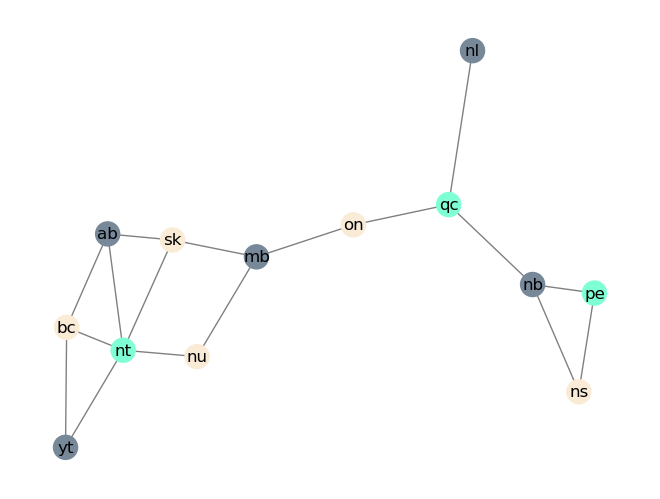

In [94]:
# Create a graph from the adjacency list
G = nx.Graph(cmap)

# Create a color map based on sol
color_map = [sol[key] for key in G]

# Use a layout algorithm to position the nodes (e.g., spring layout)
pos = nx.spring_layout(G)  # This uses the Fruchterman-Reingold algorithm

# Draw the graph using the calculated positions
nx.draw(G, pos, with_labels=True, node_color=color_map, edge_color='gray')

plt.show()

## Discussion

As explained above, the variables are defined by considering the key in the map, each key is essntially a variable, with the values being its neighbors, since the problem involves making sure that adjacent neighbors do not have the same color, this means that we define our constraints in pairs, pairs of neighbors (x, y), such that the value assigned to x must not be the same as the value assigned to y.

Moreover, since the values that a variable take on will depend on the value that is adjacent neighbor has, we must also consider that each variable has its own domain, and defining it as such is important, because its domain can become restricted based on which value its adjacent neighbors take on. This is also crucial for the implementation of forward checking, since it actively modifies the domain of adjacent variables' domains, based on the assignment made to the current variable. 

Forward checking improves the backtracking algorithm, as by eliminating the values in free variables that are conflicting with the values assigned to other variables (non-free variables), we reduce the number of iterations it takes to reach a solution.

## Conclusion

In conclusion, the backtracking search with forward checking is an efficient way to find a solution to the constraint satisfaction problem, however, it can still be improved on. One particular area that can be improved on is by introduce a heuristic that determines which free variable to choose next, and this can be done by considering the domains of the free variables. For example, since forward checking modifies the domains of free variables and could make them smaller, we may choose to select an unassigned variable with the least number of values in its domain, it could even be down to one! This approach is known as the **Minimum Remaining Values (MRV)** heuristic.

The most challenging part of the lab was trying to find a way to visualize the map in such a way that looks like a map, and not just a network of nodes.